In [1]:
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Example model
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report


In [2]:
# Mount Google Drive
drive.mount('/content/drive')

# Load dataset from Google Drive
drive_path = '/content/drive/MyDrive/IDS data sets/'
train_file_minmax = drive_path + 'NF-BoT-IoT-V2_5000 samples_minmax_normalized_train.csv'

train_data = pd.read_csv(train_file_minmax)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
print(train_data.columns)

Index(['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES',
       'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS', 'TCP_FLAGS', 'CLIENT_TCP_FLAGS',
       'SERVER_TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'DURATION_IN',
       'DURATION_OUT', 'MIN_TTL', 'MAX_TTL', 'LONGEST_FLOW_PKT',
       'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN', 'MAX_IP_PKT_LEN',
       'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES',
       'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS',
       'RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS',
       'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT',
       'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
       'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES',
       'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT',
       'ICMP_TYPE', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE',
       'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE', 'Attack'],
      dtype='object')


In [4]:
X_train = train_data.drop(columns=['Attack'])
y_train = train_data['Attack']

In [5]:
y_train.iloc[658]

'DDoS'

In [6]:
# Define the function for Grid Search Tuning
def GrdSrch_Tune(model, X, y, params):
    # Using recall as scoring for multiclass classification
    clf = GridSearchCV(model, params, scoring='recall_weighted', cv=5, n_jobs=-1)
    clf.fit(X, y)

    print("Best score is:", clf.best_score_)
    print("Best estimator is:", clf.best_estimator_)
    print("Best parameters are:", clf.best_params_)

    return clf.best_estimator_


In [7]:
params_DT = {
    'max_depth': [5, 10, 15],               # Limited max depth to prevent overfitting.
    'min_samples_split': [2, 5, 10],        # Keep the minimum samples for a split to prevent the tree from growing too large.
    'min_samples_leaf': [1, 2, 4],          # Ensure at least 1-4 samples in each leaf node to reduce overfitting.
    'max_features': ['sqrt', 'log2'],       # Use a subset of features at each split to reduce model complexity.
    'criterion': ['gini', 'entropy'],      # Gini and entropy are both good for measuring the quality of splits.
}
from sklearn.tree import DecisionTreeClassifier
GrdSrch_Tune(DecisionTreeClassifier(random_state = 42), X_train,y_train, params_DT )

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best score is: 0.9862500000000001
Best estimator is: DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_split=10,
                       random_state=42)
Best parameters are: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}


DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_split=10,
                       random_state=42)

In [8]:
DT_Model = DecisionTreeClassifier(criterion= 'gini' ,max_depth=5, max_features='sqrt', min_samples_split=10,
                       random_state=42)
DT_Model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_split=10,
                       random_state=42)

In [9]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd

# Define the file path for the test dataset
test_file = '/content/drive/MyDrive/IDS data sets/NF-BoT-IoT-V2_5000 samples_minmax_normalized_test.csv'

# Load the test data
test_data = pd.read_csv(test_file)

# Check the first few rows to confirm the data has been loaded correctly
#print(test_data.head())
print(test_data.shape)

(1001, 42)


In [11]:
# Separate features (X_test) and target (y_test)
X_test = test_data.drop(columns=['Attack'])
y_test = test_data['Attack']


In [12]:
#trained model is named DT_Model
y_pred = DT_Model.predict(X_test)

# Access the prediction for the 698th sample
print(f"Prediction for sample 698: {y_pred[698]} and the actual target is : {y_test[698]}")


Prediction for sample 698: DDoS and the actual target is : DDoS


In [13]:
import joblib

# Save the trained Decision Tree model to a file
joblib.dump(DT_Model, "/content/drive/MyDrive/IDS data sets/DT_Model.joblib")


['/content/drive/MyDrive/IDS data sets/DT_Model.joblib']

In [14]:
#from sklearn.metrics import classification_report,confusion_matrix

#classificatoin Report
rep = classification_report(y_test,y_pred)
print(rep)

#confusion Matrix
conf = confusion_matrix(y_test,y_pred)
print(conf)

                precision    recall  f1-score   support

        Benign       0.50      0.17      0.25         6
          DDoS       0.99      0.99      0.99       484
           DoS       0.98      0.98      0.98       436
Reconnaissance       0.91      0.96      0.94        75

      accuracy                           0.98      1001
     macro avg       0.84      0.77      0.79      1001
  weighted avg       0.98      0.98      0.98      1001

[[  1   0   1   4]
 [  0 479   5   0]
 [  0   7 426   3]
 [  1   0   2  72]]


Text(0.5, 1.0, 'Confusion Matrix')

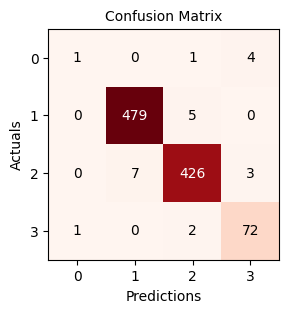

In [15]:
#mlxtend plot_confusion_matrix
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf,figsize=(3,3), cmap=plt.cm.Reds)

plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)

In [16]:
from sklearn.model_selection import cross_val_score
scores_DT = cross_val_score(DT_Model, X_train, y_train ,cv = 10, scoring = 'recall_weighted')
avg_scores_DT = scores_DT.mean()
avg_scores_DT

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


0.98575

In [17]:
scores_DT_test = cross_val_score(DT_Model, X_test, y_test ,cv = 10, scoring = 'recall_weighted')
avg_scores_DT_test = scores_DT_test.mean()
avg_scores_DT_test

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.9760099009900991

In [18]:
print("Train score is:",format(avg_scores_DT))
print("Test score is:",format(avg_scores_DT_test))

Train score is: 0.98575
Test score is: 0.9760099009900991
